In [2]:
import json
import pandas as pd

In [3]:
try:
    with open('./data/hotels_korea_reviews_text.json') as file:
        a=file.read()
except Exception as e:
    print(e)
    with open('./data/hotels_korea_reviews_text.json',encoding="utf-8") as file:
        a=file.read()
a[:100]

'[\n  {\n    "data": {\n      "page": {\n        "html": {\n          "lang": "ko",\n          "langdir": "'

### 로드 후 길이재기

In [4]:
b=json.loads(a)
len(b)

9027

In [5]:
b[0] # JSON포매터로 필요한걸 찾아봄 여기서는 구조파악이 어려움.

{'data': {'page': {'html': {'lang': 'ko',
    'langdir': 'LTR',
    'locale': 'ko_KR',
    'attributes': {'xmlns:fb': 'http://www.facebook.com/2008/fbml'}},
   'head': {'title': '거제 상상속의집 (SangSang Hotel) 이용 후기',
    'links': [{'href': 'https://kr.hotels.com/ho1041793024-tr-p1/sangsangsog-uijib-geoje-hangug/',
      'rel': 'canonical'},
     {'href': 'https://es.hoteles.com/ho1041793024-tr-p1/sangsang-hotel-geoje-corea-del-sur/',
      'hreflang': 'es-ES',
      'rel': 'alternate'},
     {'href': 'https://ca.hotels.com/ho1041793024-tr-p1/sangsang-hotel-geoje-south-korea/',
      'hreflang': 'en-CA',
      'rel': 'alternate'},
     {'href': 'https://sg.hotels.com/ho1041793024-tr-p1/sangsang-hotel-geoje-south-korea/',
      'hreflang': 'en-SG',
      'rel': 'alternate'},
     {'href': 'https://www.hoteles.com/ho1041793024-tr-p1/sangsang-hotel-geoje-corea-del-sur/',
      'hreflang': 'es-MX',
      'rel': 'alternate'},
     {'href': 'https://uk.hotels.com/ho1041793024-tr-p1/sangsang-hotel

### 찾는 데이터 위치 파악 후
- 파이썬에서 해당키를 출력해본후 맞는값이 나오면 변수에담기

In [6]:
#예) 호텔ID
hotel_id=b[0]["data"]["body"]["pdpHeader"]['hotelId']

In [8]:
# 찾고있던 데이터들 모여있는 지점 발견
b[0]["data"]["body"]['reviewContent']['reviews']['hermes']['groups'][0]['items'][0]

{'itineraryId': '72009037635503',
 'brand': 'expedia',
 'genuineMsg': 'Expedia 실제 이용 고객 후기',
 'googleTranslateEnabled': False,
 'tripType': 'family',
 'tripTypeText': '1박 가족 여행',
 'reviewDate': '2020년 11월 20일',
 'reviewDbDate': '1606003200000',
 'reviewer': {'name': '나미', 'locality': 'kr', 'locale': 'ko_KR'},
 'rating': '10.0',
 'badge': '최고 좋음',
 'summary': '',
 'description': '주차가 객실당 한칸씩 차고가 있는게 굉장히 특이했으며 가장 편리했음.\n간혹 차에 무언가를 두고와서 가지러 가는 경험을 하는데 리조트나 다른 펜션이었다면 주차장까지 내려가는 번거로움이 있었겠지만 이 호텔에서는 객실 바로밑에 주차장이 있어서 주차장이 가장편리 하였다.\n하지만 방음 수준은 최악'}

In [9]:
# 앞부분이 겹치니 변수에 담아서 깔끔하게.
reviews=b[0]["data"]["body"]['reviewContent']['reviews']['hermes']['groups'][0]['items']
reviews[0]['reviewDate']

'2020년 11월 20일'

In [10]:
# <사용자리뷰테이블>
# 호텔ID
hotel_id=b[0]["data"]["body"]["pdpHeader"]['hotelId']
# 리뷰일
review_date=reviews[0]['reviewDate'] 
# 고객ID
itineraryId=reviews[0]["itineraryId"]
# 여행타입
tripType=reviews[0]['tripType']
# 평점
rating=reviews[0]["rating"]
# 리뷰text
description=reviews[0]["description"]

### 좌표잡다가 리스트나오면 길이를재
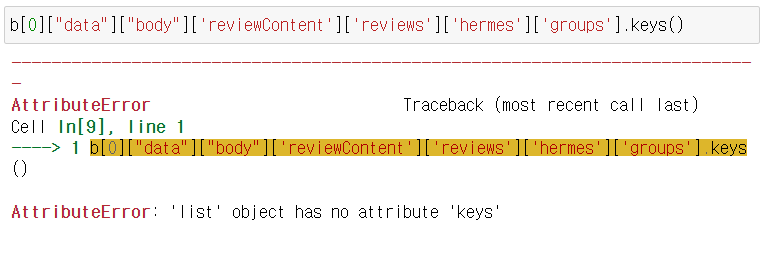
**리스트 내용물이 몇개인지**
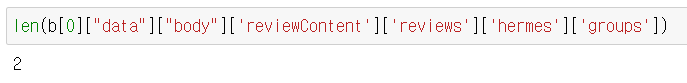

각각의 값이 잘들어오는지 확인하고, 이제 모으기
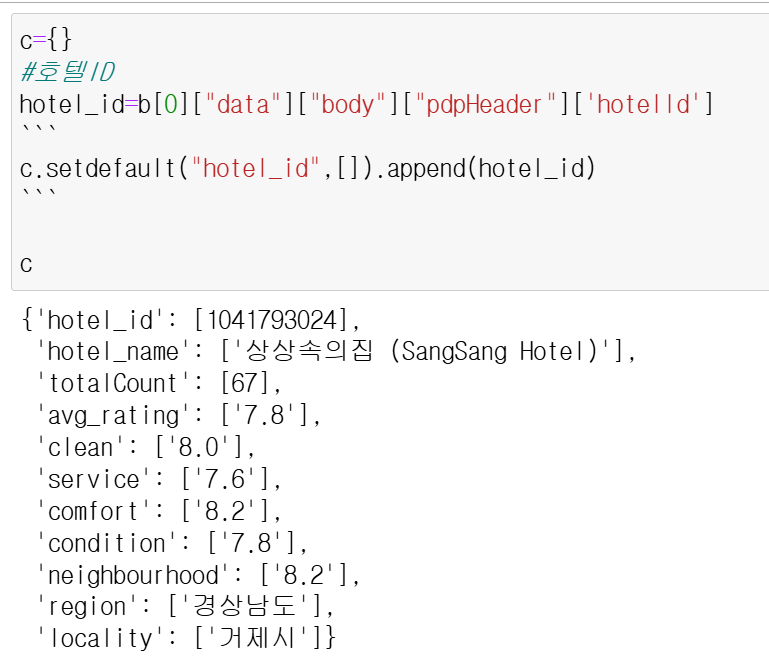
인데 이방법 말고 다른방법

- 키와 벨류들이 한 장소에 모여있으니 키리스트를 가지고 벨류를 일정하게 뽑아낼것.
- 실시간 추출 문구 ( 몇페이지의 데이터를 추출하는지 확인해주는 장치 ) 만들기<br> print와 f스트링 활용
- 수집할내용이 빠진 일부 리뷰는 setdefault를 쓰기.
- 리뷰가 없어 중단될것을 예외처리하기. try-except에 넣기. except에 리뷰가 없다는걸 출력하게 하기.

In [14]:
# reviews 키리스트 만들기 (필요없는건 지우기. )
reviews[0].keys()
# 변수에 담고 key_list=['itineraryId', 'tripType', 'reviewDate', 'rating', 'description']

dict_keys(['itineraryId', 'brand', 'genuineMsg', 'googleTranslateEnabled', 'tripType', 'tripTypeText', 'reviewDate', 'reviewDbDate', 'reviewer', 'rating', 'badge', 'summary', 'description'])

In [17]:
# 키리스트를 가지고 반복문으로 벨류 출력하기.
key_list=['itineraryId', 'tripType', 'reviewDate', 'rating', 'description']
all_reviews={}
for key in key_list:
    for review in reviews:
        all_reviews.setdefault(key,[]).append(review[key])
        
all_reviews

{'itineraryId': ['72009037635503',
  '9202656047317',
  '9196559102828',
  '9201554317978',
  '9196473456283',
  '71000309099267',
  '9201194045923',
  '9196050465566',
  '9195718125010',
  '9206508579578',
  '9211413842441',
  '9211166387771',
  '9205537092506',
  '9210621688359',
  '9205734195501',
  '9210795416763',
  '9205554325789',
  '9210580152000',
  '9205502571783',
  '9205410044681',
  '9205448865394',
  '8032491109450',
  '8006687906433',
  '8071845116000',
  '9205019665159',
  '8073704305904',
  '8145769805022',
  '8097456002737',
  '8134848801026',
  '8150518787796',
  '8139378301082',
  '8141008712837',
  '8149764930530',
  '8159228614416',
  '8155026317082',
  '8122841455624',
  '8125914005329',
  '8125340761673',
  '8131064800735',
  '8146539683801',
  '8109405761680',
  '8110659736811'],
 'tripType': ['family',
  'family',
  'other',
  'other',
  'family',
  'family',
  'family',
  'other',
  'other',
  'family',
  'other',
  'other',
  'family',
  'family',
  'family'

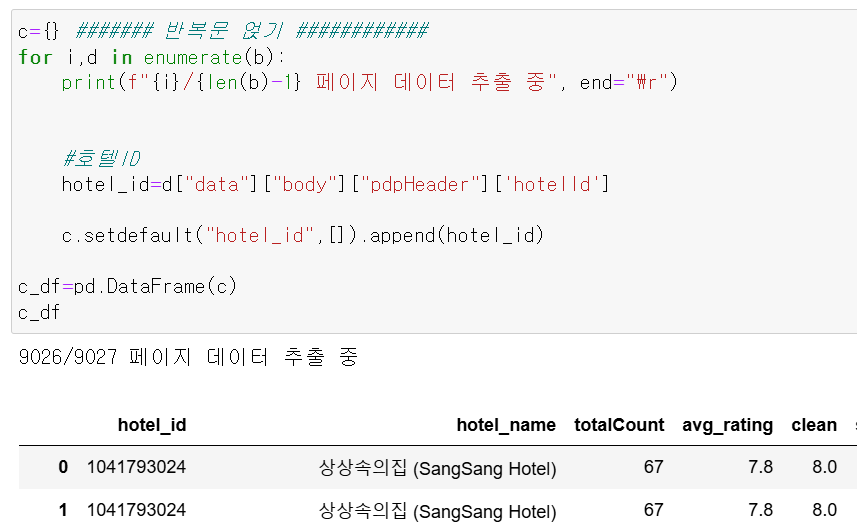

In [17]:
# all_reviews에 담은 틀을 반복문 -> 자료범위가 전체되도록.

for idx, hotel in enumerate(b):
    print(f"{idx}/{len(b)-1} 페이지 추출중", end="\r")
    hotel_id=hotel["data"]["body"]["pdpHeader"]['hotelId']
    try:
        

key_list=['itineraryId', 'tripType', 'reviewDate', 'rating', 'description']
all_reviews={}
for key in key_list:
    for review in reviews:
        all_reviews.setdefault(key,[]).append(review[key])
        


{'itineraryId': ['72009037635503',
  '9202656047317',
  '9196559102828',
  '9201554317978',
  '9196473456283',
  '71000309099267',
  '9201194045923',
  '9196050465566',
  '9195718125010',
  '9206508579578',
  '9211413842441',
  '9211166387771',
  '9205537092506',
  '9210621688359',
  '9205734195501',
  '9210795416763',
  '9205554325789',
  '9210580152000',
  '9205502571783',
  '9205410044681',
  '9205448865394',
  '8032491109450',
  '8006687906433',
  '8071845116000',
  '9205019665159',
  '8073704305904',
  '8145769805022',
  '8097456002737',
  '8134848801026',
  '8150518787796',
  '8139378301082',
  '8141008712837',
  '8149764930530',
  '8159228614416',
  '8155026317082',
  '8122841455624',
  '8125914005329',
  '8125340761673',
  '8131064800735',
  '8146539683801',
  '8109405761680',
  '8110659736811'],
 'tripType': ['family',
  'family',
  'other',
  'other',
  'family',
  'family',
  'family',
  'other',
  'other',
  'family',
  'other',
  'other',
  'family',
  'family',
  'family'

In [18]:
# <반복문 얹을 준비>
c={}
for d in reviews:
#    print(f"{i}/{len(b)})

    # 호텔ID 는 reviews에서 들어오는게 아니므로 
    #hotel_id=d["data"]["body"]["pdpHeader"]['hotelId']
    # 리뷰일
    review_date=d['reviewDate']
    # 고객ID
    itineraryId=d["itineraryId"]
    # 여행타입
    tripType=d['tripType']
    # 평점
    rating=d["rating"]
    # 리뷰text
    description=d["description"]

#앞에서 풀었던것과 다르게~    
    #c.setdefault('hotelId',[]).append(hotel_id)
#     c.setdefault('reviewDate',[]).append(review_date)

#     c.setdefault('itineraryId',[]).append(itineraryId)
#     c.setdefault('tripType',[]).append(tripType)

#     c.setdefault('rating',[]).append(rating)
#     c.setdefault('description',[]).append(description)

c # 잘 들어오는지 확인

{}

In [22]:
reviews[0].keys()

dict_keys(['itineraryId', 'brand', 'genuineMsg', 'googleTranslateEnabled', 'tripType', 'tripTypeText', 'reviewDate', 'reviewDbDate', 'reviewer', 'rating', 'badge', 'summary', 'description'])

```reviews[0].keys()``` 들중 필요한것들만 골라내기<br>
```key_list=['reviewDate','itineraryId','tripType','rating','description']```

In [24]:
# <반복문 얹기>
c={}
key_list=['reviewDate','itineraryId','tripType','rating','description']

for key in key_list:
    for d in reviews:
        c.setdefault(key,[]).append(d[key])
c


{'reviewDate': ['2020년 11월 20일',
  '2020년 11월 14일',
  '2020년 8월 11일',
  '2020년 8월 10일',
  '2020년 8월 7일',
  '2019년 9월 12일',
  '2020년 7월 15일',
  '2020년 6월 26일',
  '2020년 4월 17일',
  '2020년 2월 21일',
  '2020년 2월 7일',
  '2020년 1월 12일',
  '2019년 12월 20일',
  '2020년 1월 1일',
  '2019년 12월 27일',
  '2019년 12월 20일',
  '2019년 12월 8일',
  '2019년 12월 6일',
  '2019년 12월 4일',
  '2019년 11월 29일',
  '2019년 11월 28일',
  '2019년 10월 3일',
  '2019년 10월 4일',
  '2019년 9월 17일',
  '2019년 9월 7일',
  '2019년 8월 22일',
  '2019년 3월 1일',
  '2019년 8월 8일',
  '2019년 8월 2일',
  '2019년 6월 5일',
  '2019년 5월 18일',
  '2019년 4월 30일',
  '2019년 4월 6일',
  '2019년 3월 31일',
  '2019년 3월 8일',
  '2019년 3월 2일',
  '2019년 2월 18일',
  '2019년 2월 17일',
  '2019년 2월 16일',
  '2019년 2월 9일',
  '2019년 1월 19일',
  '2018년 12월 14일'],
 'itineraryId': ['72009037635503',
  '9202656047317',
  '9196559102828',
  '9201554317978',
  '9196473456283',
  '71000309099267',
  '9201194045923',
  '9196050465566',
  '9195718125010',
  '9206508579578',
  '9211413842441',
  '9211

In [30]:
b[0]['data']['body']['reviewContent']['reviews']['hermes']['groups'][0]['items']

[{'itineraryId': '72009037635503',
  'brand': 'expedia',
  'genuineMsg': 'Expedia 실제 이용 고객 후기',
  'googleTranslateEnabled': False,
  'tripType': 'family',
  'tripTypeText': '1박 가족 여행',
  'reviewDate': '2020년 11월 20일',
  'reviewDbDate': '1606003200000',
  'reviewer': {'name': '나미', 'locality': 'kr', 'locale': 'ko_KR'},
  'rating': '10.0',
  'badge': '최고 좋음',
  'summary': '',
  'description': '주차가 객실당 한칸씩 차고가 있는게 굉장히 특이했으며 가장 편리했음.\n간혹 차에 무언가를 두고와서 가지러 가는 경험을 하는데 리조트나 다른 펜션이었다면 주차장까지 내려가는 번거로움이 있었겠지만 이 호텔에서는 객실 바로밑에 주차장이 있어서 주차장이 가장편리 하였다.\n하지만 방음 수준은 최악'},
 {'itineraryId': '9202656047317',
  'brand': 'hcom',
  'genuineMsg': 'Hotels.com 실제 이용 고객 후기',
  'googleTranslateEnabled': False,
  'tripType': 'family',
  'tripTypeText': '1박 가족 여행',
  'reviewDate': '2020년 11월 14일',
  'reviewDbDate': '1605744000000',
  'reviewer': {'name': 'SUNG KYU', 'locality': 'kr', 'locale': 'ko_KR'},
  'rating': '10.0',
  'badge': '최고 좋음',
  'summary': '훌륭한 뷰의 넓고 깨끗한 객실',
  'description': '1. 오션뷰\n  - 남해안의 어느 숙박

In [29]:
all_reviews_list=[]
for idx, hotel in enumerate(b):
    print(f"{idx}/{len}(b) 페이지 데이터 추출중", end="\r")
    hotel_id=hotel['data']['body']['pdpHeader']['hotelId']
    
    try:
        reviews=hotel['data']['body']['reviewContent']['reviews']['hermes']['groups'][0]['items']
    except Exception as e:
        print(e)
        print(f"{idx}페이지에 수집할 리뷰가 없습니다", end="\n\n")
        
    key_list=['reviewDate','itineraryId','tripType','rating','description']
    all_reviews={}
    all_reviews['hotel_id']=hotel_id
    
    for key in key_list:
        for review in reviews[:2]:          
            all_reviews.setdefault(key,[]).append(review[key])
            
    all_reviews_df=pd.DataFrame(all_reviews)
    all_reviews_list.append(all_reviews_df)

    # all_reviews_list[0] #  [0]에만 한국어 후기가 들어있음
# 잘들어오니까 이제 데이터프레임만 나오도록 실행


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)





2020년 6월 30일
2020년 6월 26일
9195727112104
9195758096178
family
other
10.0
6.0
만족스러웠어요 수영장도 바로 앞이라놀고 들어가기좋고 룸도 널찍하고 깨끗했어요 시설도 신경많으쓰신듯했구요 아이가있어 걱정했는데 오히려 편했습니다~ 잘 놀다갑니다~~
바닥보일러도 셀프조정가능하고
렌지와 약간의  그릇도 있어서  ㅡ저는사용안함.
근데 근처에 편의점도 아무것도 없어요
미리 다사가세요.
2020년 1월 23일
2019년 8월 15일
9205621286299
8016901757377
family
family
6.0
10.0
성인가족은 창문있는 패밀리룸 맨끝방. 넘넘좁고 진짜 비추천입니다.방도 넘좁고 침대는 거의 붙어있다시피,상체누이는 쪽에 튀어나온 기둥에 남편 새벽에 일어나다 모서리에 머리부딪혀 지금도 혹났다고 아프다고.침대옆에 커다란기둥이있어 화장실갈때 몸을 가로로 벽에 밀착해서들어가야하고 창문이있는게 좋다고 선심베푸는거처럼 말씀하시더니 창문에서 황소바람에 위풍은 얼마나 센지ㅜㅜ..머리를 반대로 놓고 잘정도였어요.바닥만 난방되고 위는 하나도 난방안되서 이불을 목까지 덮고도 춥다고...참 호텔스닷컴서 호텔이랑 게스트 수없이 해봤는데 이렇게 불평남기기는 난생첨이에요..우리나라 날씨 요즘 얼마나 따뜻한데 추워서 잠못잘정도 였으니..진짜 한겨울에오면 추워서  못잡니다..다신 오고싶지않아요
머리부딪친 남편 머리에 혹나서 지금도 아프다고 엄청뭐라합니다
숙박후 아들이 mp3을 두곤 온것을 전화로 확인해 주시고 택배로 배송까지 해 주셔서 정말로 감사했습니다. 다시한번 감사드리고 다음번에도 다시 이용하도록 하겠습니다.
2019년 9월 17일
2019년 8월 26일
8030411506434
7464858927110
other
other
10.0
10.0
Very nice play to stay. The location is absolutely perfect, and despite the street below being very li

In [27]:
all_reviews_df=pd.concat(all_reviews_list)
all_reviews_df

,hotel_id,reviewDate,itineraryId,tripType,rating,description
0,1041793024,2020년 11월 20일,72009037635503,family,10.0,주차가 객실당 한칸씩 차고가 있는게 굉장히 특이했으며 가장 편리했음.\n간혹 차에 ...
1,1041793024,2020년 11월 14일,9202656047317,family,10.0,1. 오션뷰\n - 남해안의 어느 숙박업소가 그렇듯이 오션뷰가 좋습니다. 이 호텔...
2,1041793024,2020년 8월 11일,9196559102828,other,10.0,커플이 다녀가기에 좋은 숙소. 프라이빗함과 뷰도 갖춘 좋은 곳
3,1041793024,2020년 8월 10일,9201554317978,other,8.0,"위치와 뷰는 정말 좋습니다. 개별주차장이 생각보다 쓰기 좋았습니다. 다만, 호텔보다..."
4,1041793024,2020년 8월 7일,9196473456283,family,8.0,스탠다드 이용했어요\n방마다 차고가 있어서 편하게 짐 옮겼네요\n제가 이용한 방에 ...
...,...,...,...,...,...,...
0,718356256,2018년 8월 4일,8120843372947,family,8.0,사진을 굉장히 잘 찍으신듯 해요- 4명이 이용 가능한 펜션 알아보다 방문했는데\r\...
0,718356256,2018년 8월 4일,8120843372947,family,8.0,사진을 굉장히 잘 찍으신듯 해요- 4명이 이용 가능한 펜션 알아보다 방문했는데\r\...
0,1344945952,2020년 9월 14일,9196902905665,business,8.0,
1,1344945952,2020년 7월 13일,9201269638204,business,2.0,


키에러.<br>
b의 9번째 요소에 문제가 있는것.
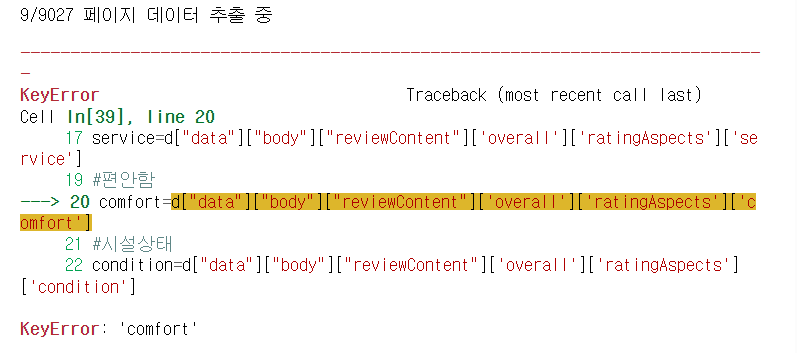

In [40]:
# 찍어보면 필요한 정보 여러가지가 누락된상황(그상위폴더도.)
d["data"]["body"]["reviewContent"]['overall']['ratingAspects']
#이런경우 .get 으로 누락된 부분을 채우기로함.

{'cleanliness': '10.0', 'service': '10.0', 'condition': '10.0'}

In [43]:
# 또다른 키에러.

d["data"]["body"]["propertyDescription"]['address']
# region==locality여야하는 상황.
# 여기서도 get을 이용한다.

{'countryName': '한국',
 'locality': '서울특별시',
 'postalCode': '1168',
 'streetAddress': '강북구 솔매로 62-3',
 'countryAlpha3Code': 'KOR'}

### get함수로 마무리하는게 보편적. <br><br> 오류가 어디있는지 체크하기위해 초반에는 get이 없이 돌려보기도한다.

In [14]:
# gpt하고 싸울뻔한 코드 #################
reviews={'itineraryId': '72009037635503',
 'brand': 'expedia',
 'genuineMsg': 'Expedia 실제 이용 고객 후기',
 'googleTranslateEnabled': False,
 'tripType': 'family',
 'tripTypeText': '1박 가족 여행',
 'reviewDate': '2020년 11월 20일',
 'reviewDbDate': '1606003200000',
 'reviewer': {'name': '나미', 'locality': 'kr', 'locale': 'ko_KR'},
 'rating': '10.0',
 'badge': '최고 좋음',
 'summary': '',
 'description': '주차가 객실당 한칸씩' }
key_list=['itineraryId', 'tripType', 'reviewDate', 'rating', 'description']

all_reviews={}
for key in key_list:
    for review in reviews:
        all_reviews.setdefault(key,[]).append(review[key])

dict_keys(['itineraryId', 'brand', 'genuineMsg', 'googleTranslateEnabled', 'tripType', 'tripTypeText', 'reviewDate', 'reviewDbDate', 'reviewer', 'rating', 'badge', 'summary', 'description'])